In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.8.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 131.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 74.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
    

In [ ]:
!pip uninstall keras -y
!pip install keras==2.8.0
!pip install h5py==2.10.0

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h5py: filename=h5py-2.10.0-cp310-cp310-linux_x86_64.whl size=4717586 sha256=22144e4ce302641af84a603858ebee90b31a76afbdfa0441bf73bbf17ca34cef
  Stored in directory: /root/.cache/pip/wheels/21/bc/58/0d0c6056e1339f40188d136cd838c6554d9c17545196dd9110
Successfully built h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip -qq '/content/dataset.zip' -d '/content'
data_dir = '/content/dataset'

In [ ]:
# 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255)  # 이미지 스케일링
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # ResNet50 입력 크기에 맞게 조정
    batch_size=64,
    class_mode='categorical'  # 분류 작업일 경우
)

Found 552 images belonging to 5 classes.


In [ ]:
# MobilenetV2 모델을 사용하도록 변경
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet') # 필요에 따라 alpha 값 바꿀 수 있음.

# 기존 코드와 동일하게 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # num_classes는 클래스 개수에 따라 설정

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 기존 코드와 동일하게 모델 컴파일 및 학습 데이터 생성
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# 모델 학습
history = model.fit(train_generator, epochs=20)  # 적절한 에포크 수로 변경

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
9/9 [==============================] - 139s 13s/step - loss: 0.8262 - accuracy: 0.6812
Epoch 2/20
9/9 [==============================] - 120s 13s/step - loss: 0.3116 - accuracy: 0.8587
Epoch 3/20
9/9 [==============================] - 121s 13s/step - loss: 0.2014 - accuracy: 0.9112
Epoch 4/20
9/9 [==============================] - 120s 13s/step - loss: 0.1738 - accuracy: 0.9402
Epoch 5/20
9/9 [==============================] - 119s 14s/step - loss: 0.1475 - accuracy: 0.9402
Epoch 6/20
9/9 [==============================] - 120s 13s/step - loss: 0.0748 - accuracy: 0.9746
Epoch 7/20
9/9 [==============================] - 128s 14s/step - loss: 0.0710 - accuracy: 0.9728
Epoch 8/20
9/9 [==============================] - 119s 14s/step - loss: 0.0820 - accuracy: 0.9819
Epoch 9/20
9/9 [==============================] - 119s 13s/step - loss: 0.0461 - accuracy: 0.9891
Epoch 10/20
9/9 [==============================] - 120s

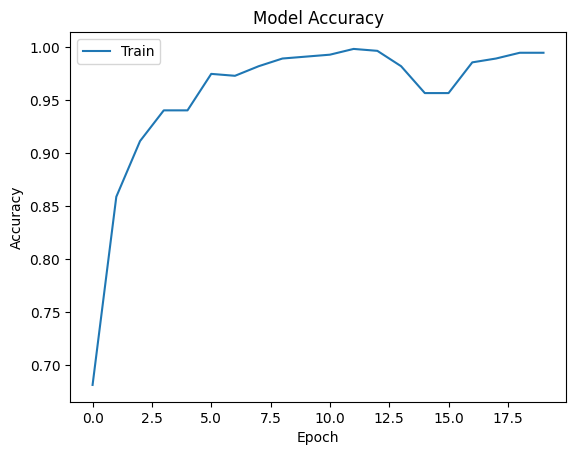

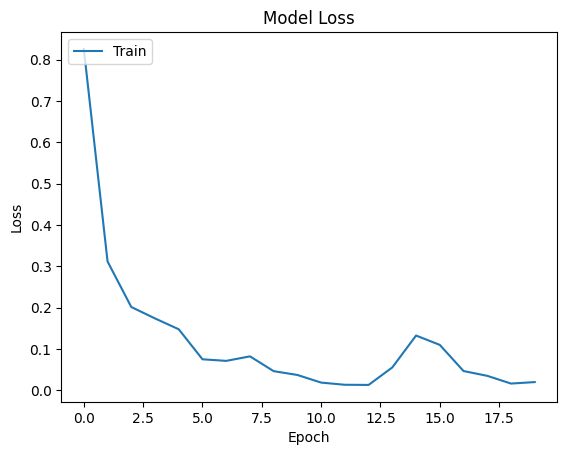

In [ ]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# 손실 그래프
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# 학습된 모델 저장
model.save('autodriving_256.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 모델 저장 경로 설정
model_path = '/content/drive/MyDrive/autodriving2/autodriving_256.h5'

# 모델 저장
model.save(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
